# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [16]:
dataset = pd.read_csv("Retail_Transactions_Dataset.csv")
dataset.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom dalam dataset: (1000000, 13)

Tipe data pada setiap kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory 

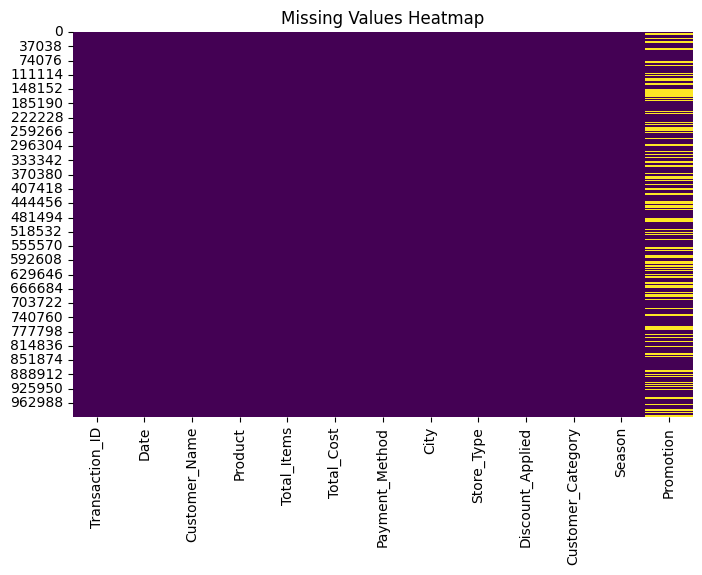

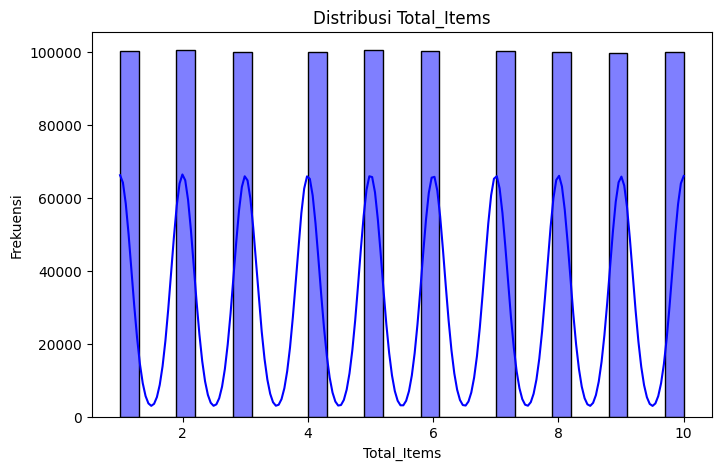

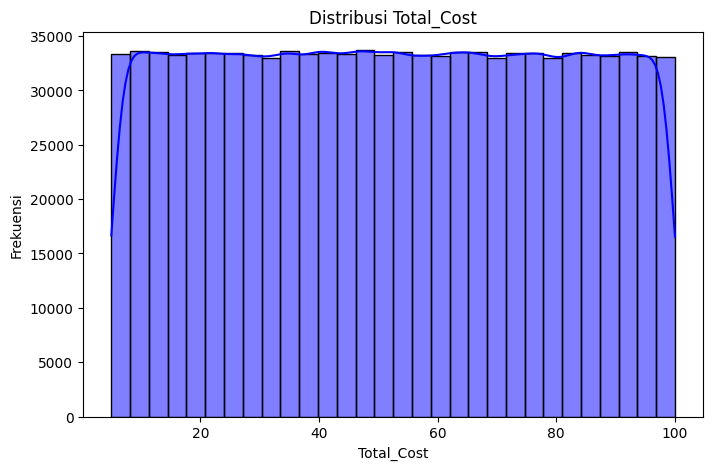

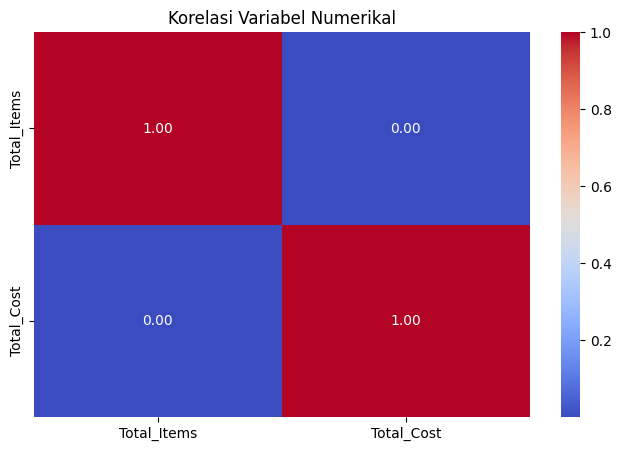

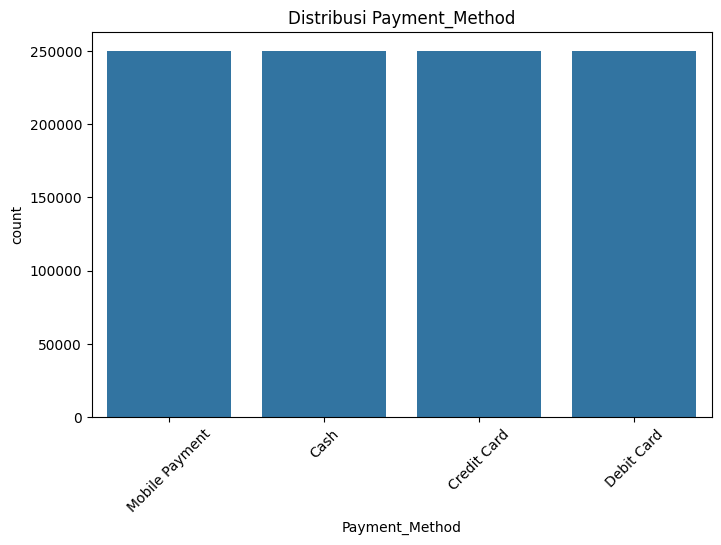

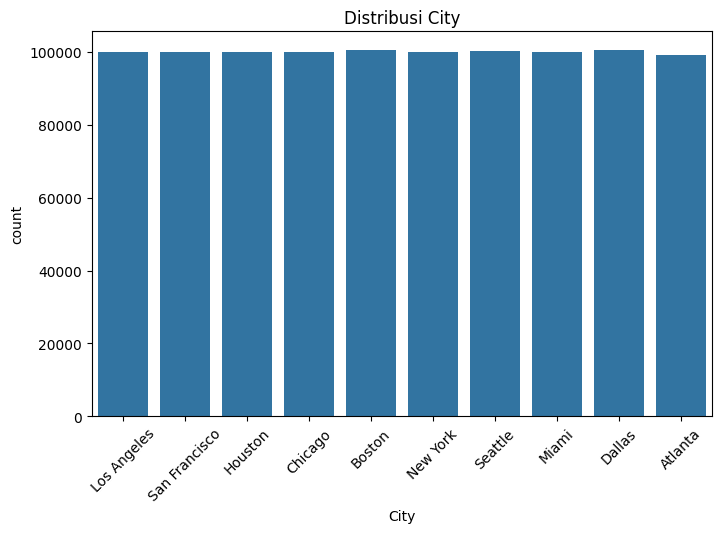

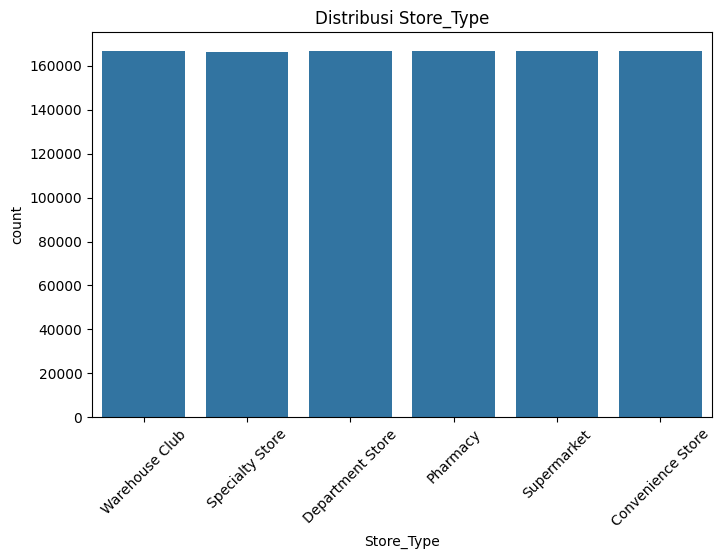

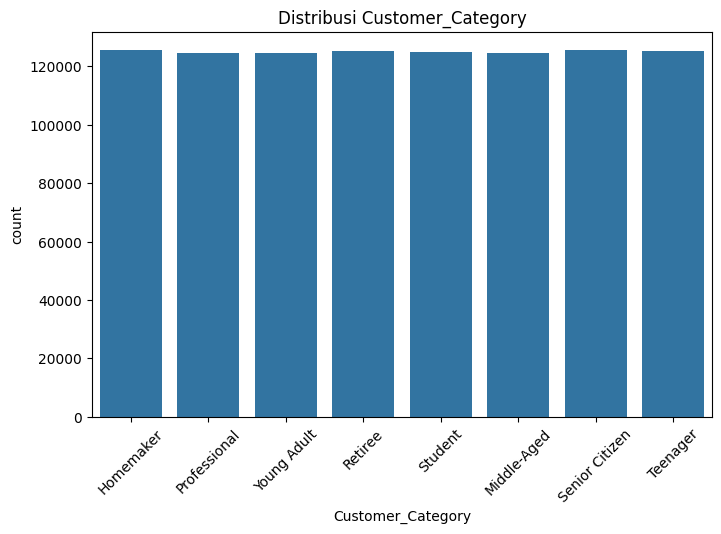

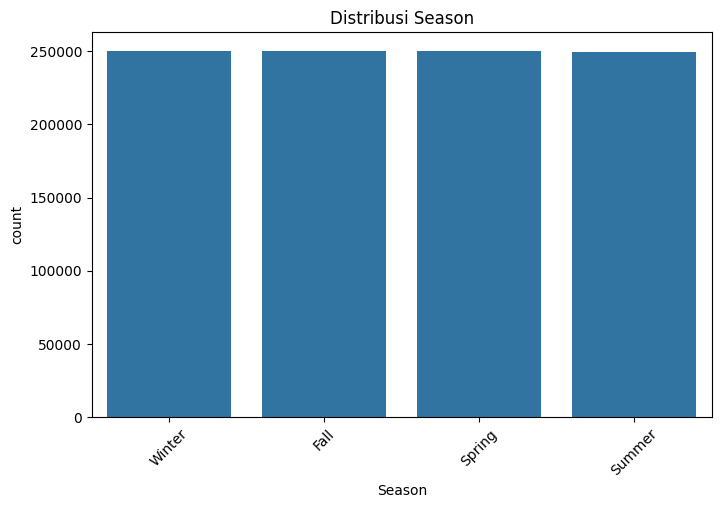

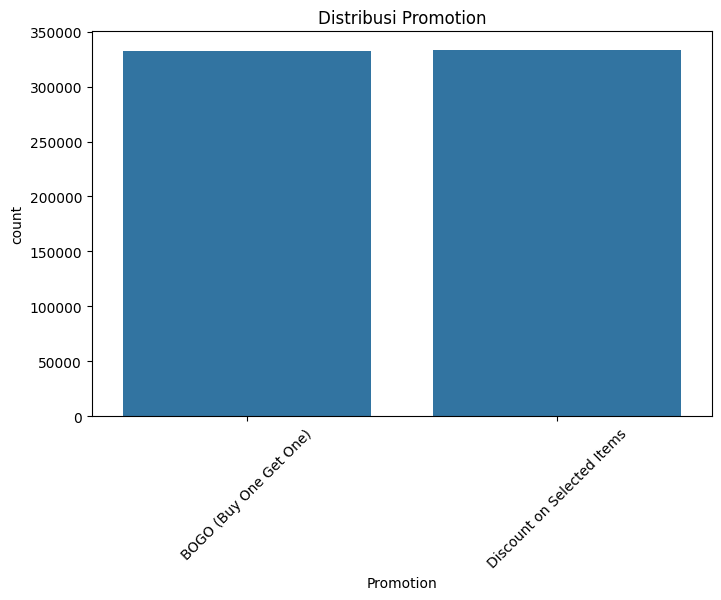

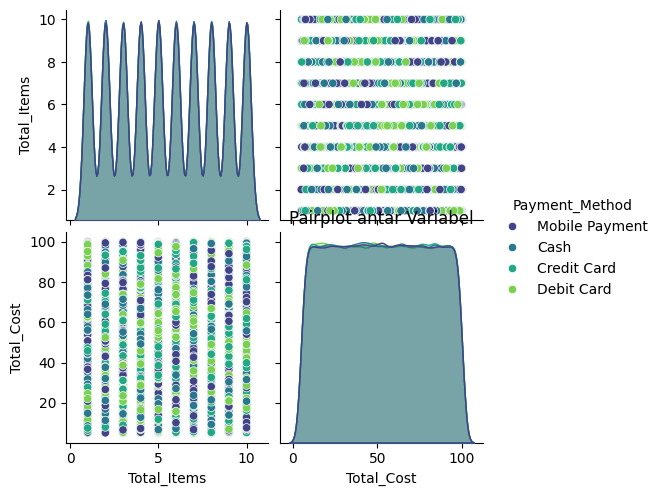

In [17]:
# Informasi dataset
print("Jumlah baris dan kolom dalam dataset:", dataset.shape)
print("\nTipe data pada setiap kolom:")
print(dataset.info())

# Cek nilai yang hilang
print("\nJumlah nilai yang hilang di setiap kolom:")
print(dataset.isnull().sum())

# Visualisasi missing values
plt.figure(figsize=(8, 5))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Variabel numerikal
numerical_cols = ['Total_Items', 'Total_Cost']

# Distribusi data numerikal
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(dataset[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Korelasi antar variabel numerikal
plt.figure(figsize=(8, 5))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Variabel Numerikal")
plt.show()

# Variabel kategorikal
categorical_cols = ['Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion']

# Visualisasi distribusi data kategorikal
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dataset, x=col)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.show()

# Pairplot antar variabel numerikal
sns.pairplot(dataset, vars=numerical_cols, hue="Payment_Method", palette="viridis")
plt.title("Pairplot antar Variabel")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Jumlah nilai kosong sebelum penanganan:
Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

Jumlah nilai kosong setelah penanganan:
Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

Jumlah data sebelum menghapus duplikasi: 1000000
Jumlah data setelah menghapus duplikasi: 1000000


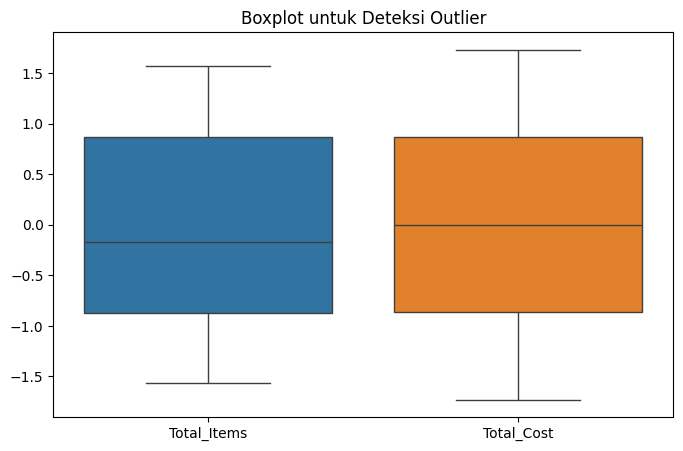


Jumlah data setelah menghapus outlier: 1000000

Contoh data setelah encoding:
   Transaction_ID                 Date      Customer_Name  \
0      1000000000  2022-01-21 06:27:29       Stacey Price   
1      1000000001  2023-03-01 13:01:21   Michelle Carlson   
2      1000000002  2024-03-21 15:37:04        Lisa Graves   
3      1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']    -0.869165    0.700106   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...    -1.217397   -0.967474   
2                                        ['Spinach']     0.175529   -0.399943   
3                             ['Tissues', 'Mustard']    -1.565628   -0.478361   
4                                      ['Dish Soap']     1.568455   -1.314340   

   Payment_Method  City  Store_Type  Discount_Applied  Customer_Cat

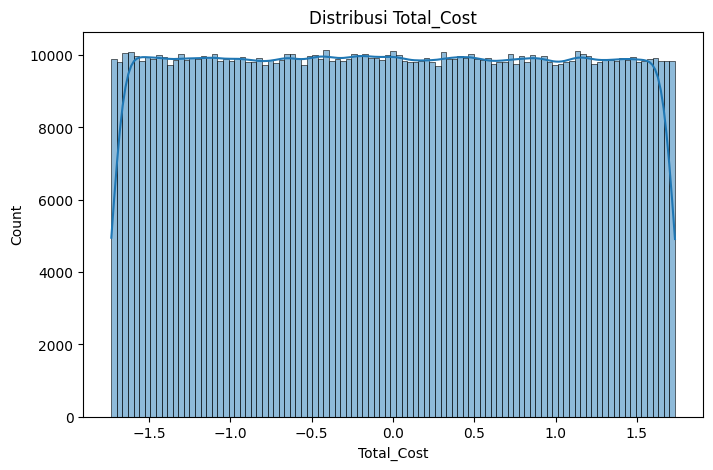

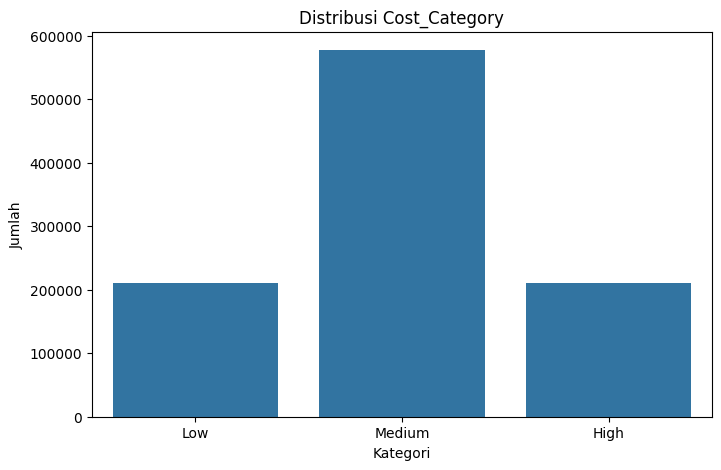


Contoh data setelah binning:
   Total_Cost Cost_Category
0    0.700106        Medium
1   -0.967474        Medium
2   -0.399943        Medium
3   -0.478361        Medium
4   -1.314340           Low


In [18]:
## Menangani Missing Values
print("Jumlah nilai kosong sebelum penanganan:")
print(dataset.isnull().sum())

# Simpan salinan data asli sebelum preprocessing
data_original = dataset.copy()  # Salinan data asli sebelum transformasi

# Mengisi missing values dengan strategi yang sesuai
for col in dataset.columns:
    if dataset[col].dtype == 'object' or dataset[col].dtype.name == 'category':  # Kategorikal
        dataset[col] = dataset[col].fillna('Unknown')  # Mengisi dengan 'Unknown'
    elif np.issubdtype(dataset[col].dtype, np.number):  # Numerikal
        dataset[col] = dataset[col].fillna(dataset[col].median())  # Mengisi dengan median

print("\nJumlah nilai kosong setelah penanganan:")
print(dataset.isnull().sum())

## Menghapus Data Duplikat
print("\nJumlah data sebelum menghapus duplikasi:", dataset.shape[0])
dataset = dataset.drop_duplicates()
print("Jumlah data setelah menghapus duplikasi:", dataset.shape[0])

## Normalisasi atau Standarisasi Fitur Numerikal
# Identifikasi kolom numerikal yang relevan
numerical_cols = ['Total_Items', 'Total_Cost']  # Kolom numerikal relevan
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

## Deteksi dan Penanganan Outlier
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset[numerical_cols])
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

# Menghapus outlier hanya untuk kolom relevan menggunakan Z-Score
z_scores = np.abs((dataset[numerical_cols] - dataset[numerical_cols].mean()) / dataset[numerical_cols].std())
dataset = dataset[(z_scores < 3).all(axis=1)]

print("\nJumlah data setelah menghapus outlier:", dataset.shape[0])

## Encoding Data Kategorikal
# Identifikasi kolom kategorikal
categorical_cols = ['Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion']

# Gunakan LabelEncoder untuk kolom kategorikal
encoder = LabelEncoder()
for col in categorical_cols:
    dataset[col] = encoder.fit_transform(dataset[col])

print("\nContoh data setelah encoding:")
print(dataset.head())

## Binning (Pengelompokan Data)
# Analisis distribusi data untuk Total_Cost
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Total_Cost'], kde=True)
plt.title("Distribusi Total_Cost")
plt.show()

# Membuat kategori berdasarkan bins yang ditentukan
bins = [-3, -1, 1, 3]  # Rentang kategori
labels = ['Low', 'Medium', 'High']  # Label kategori
dataset['Cost_Category'] = pd.cut(dataset['Total_Cost'], bins=bins, labels=labels)

# Visualisasi distribusi kategori
plt.figure(figsize=(8, 5))
sns.countplot(x='Cost_Category', data=dataset)
plt.title("Distribusi Cost_Category")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()

print("\nContoh data setelah binning:")
print(dataset[['Total_Cost', 'Cost_Category']].head())

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

c:\Users\Lenovo\anaconda3\envs\main-ds\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\anaconda3\envs\main-ds\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


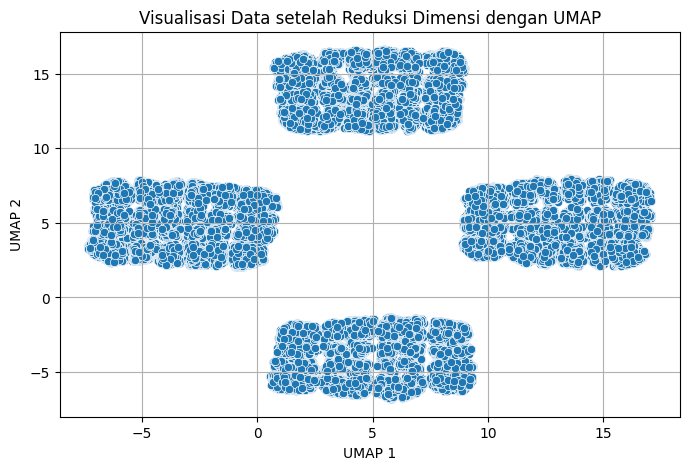

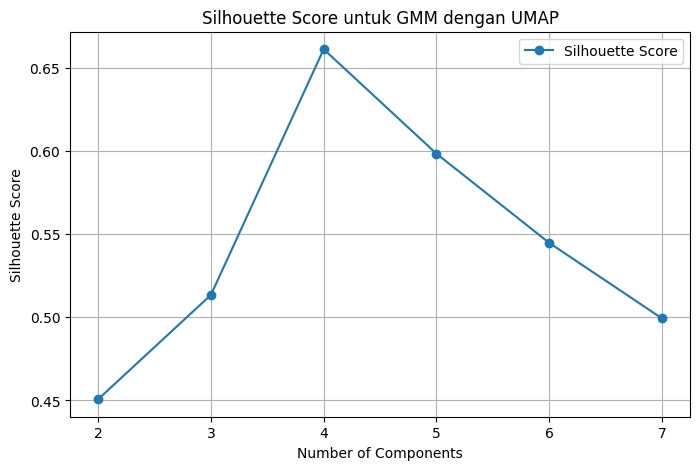

Jumlah cluster optimal untuk GMM berdasarkan Silhouette Score: 4
Silhouette Score Akhir untuk GMM: 0.661453127861023


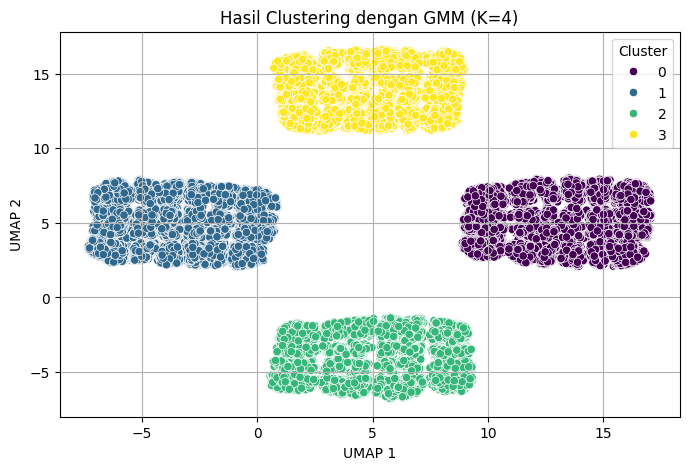

In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling data (100.000 sampel untuk efisiensi)
dataset_sampled = dataset.sample(n=100000, random_state=42)
clustering_features = ['Total_Items', 'Total_Cost', 'Payment_Method', 'Customer_Category', 'Store_Type', 'City']
X_clustering = dataset_sampled[clustering_features]

# Normalisasi data menggunakan RobustScaler
scaler = RobustScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Reduksi dimensi menggunakan UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_clustering_umap = reducer.fit_transform(X_clustering_scaled)

# Visualisasi hasil reduksi dimensi dengan UMAP
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_clustering_umap[:, 0], y=X_clustering_umap[:, 1])
plt.title("Visualisasi Data setelah Reduksi Dimensi dengan UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.show()

# Optimasi clustering dengan Gaussian Mixture Model (GMM)
gmm_range = range(2, 8)  # Range jumlah cluster
silhouette_scores_gmm = []

for k in gmm_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(X_clustering_umap)
    score = silhouette_score(X_clustering_umap, gmm_labels)
    silhouette_scores_gmm.append(score)

# Visualisasi Silhouette Score untuk GMM
plt.figure(figsize=(8, 5))
plt.plot(gmm_range, silhouette_scores_gmm, marker='o', label='Silhouette Score')
plt.title("Silhouette Score untuk GMM dengan UMAP")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()

# Menentukan jumlah cluster optimal
optimal_k = gmm_range[silhouette_scores_gmm.index(max(silhouette_scores_gmm))]
print(f"Jumlah cluster optimal untuk GMM berdasarkan Silhouette Score: {optimal_k}")

# Final GMM model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X_clustering_umap)

# Evaluasi Silhouette Score
final_silhouette_score = silhouette_score(X_clustering_umap, gmm_labels)
print(f"Silhouette Score Akhir untuk GMM: {final_silhouette_score}")

# Visualisasi hasil clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_clustering_umap[:, 0], y=X_clustering_umap[:, 1], hue=gmm_labels, palette='viridis')
plt.title(f"Hasil Clustering dengan GMM (K={optimal_k})")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

### Alasan Menggunakan Gaussian Mixture Model (GMM)

Gaussian Mixture Model (GMM) dipilih sebagai metode clustering pada analisis ini setelah mempertimbangkan dan membandingkan dengan metode clustering lainnya, seperti K-Means dan DBSCAN. Berikut alasan spesifik mengapa GMM dipilih:

1. **Hasil Silhouette Score Lebih Baik**:
   - Pada percobaan sebelumnya, metode **K-Means** dan **DBSCAN** telah diterapkan pada dataset ini, namun keduanya tidak mampu memenuhi **minimum silhouette score** yang ditetapkan sebagai kriteria evaluasi. 
   - GMM memberikan silhouette score yang lebih tinggi, menunjukkan bahwa hasil clustering lebih baik dalam memisahkan cluster yang berbeda dan mempertahankan kohesi dalam cluster yang sama.

2. **Kemampuan Menangkap Cluster dengan Bentuk Non-Bulat**:
   - Berbeda dengan K-Means yang hanya efektif untuk cluster berbentuk bulat (spherical), GMM mampu menangkap cluster dengan bentuk distribusi yang lebih kompleks, seperti elips atau distribusi non-spherical lainnya.

3. **Probabilistik Assignment**:
   - GMM memberikan probabilitas keanggotaan setiap titik data pada masing-masing cluster, memungkinkan analisis yang lebih fleksibel. Hal ini sangat berguna untuk data yang berada di batas antar cluster, yang sulit diidentifikasi secara tegas menggunakan metode seperti K-Means atau DBSCAN.

4. **Kelemahan DBSCAN pada Dataset dengan Densitas Tidak Seragam**:
   - DBSCAN memiliki kelemahan saat bekerja dengan dataset yang memiliki densitas tidak seragam. Dataset ini mengandung distribusi data yang kompleks, di mana beberapa cluster memiliki ukuran dan densitas yang berbeda. GMM lebih cocok karena tidak tergantung pada parameter densitas seperti DBSCAN.

5. **Pemodelan Distribusi Data Multivariat**:
   - Dataset ini memiliki fitur multivariat dengan hubungan kompleks antar fitur. GMM dapat memodelkan hubungan ini lebih baik dibanding metode seperti K-Means yang mengandalkan jarak Euclidean murni tanpa mempertimbangkan distribusi data.

6. **Estimasi Parameter yang Kuat**:
   - GMM menggunakan metode **Expectation-Maximization (EM)** untuk estimasi parameter seperti mean, covariance, dan probabilitas cluster. Proses ini menghasilkan model yang lebih stabil dan akurat dalam membagi cluster berdasarkan pola distribusi data.

7. **Kemampuan Menangani Noise**:
   - GMM memberikan probabilitas keanggotaan, sehingga dapat mengidentifikasi data yang dianggap sebagai noise atau outlier dengan lebih baik dibanding metode lain.

### Pertimbangan Penggunaan GMM
Walaupun GMM memiliki keunggulan yang signifikan, ada beberapa hal yang perlu dipertimbangkan:
- **Overfitting pada Dataset Kecil**:
  GMM cenderung overfitting jika jumlah data terlalu kecil atau jumlah cluster terlalu banyak.
- **Asumsi Gaussian**:
  Metode ini mengasumsikan bahwa data dalam setiap cluster mengikuti distribusi Gaussian. Jika data tidak memenuhi asumsi ini, hasil clustering bisa kurang optimal.
- **Waktu Komputasi**:
  GMM memerlukan waktu komputasi yang lebih tinggi dibanding K-Means, terutama pada dataset besar, karena harus mengestimasi lebih banyak parameter.


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

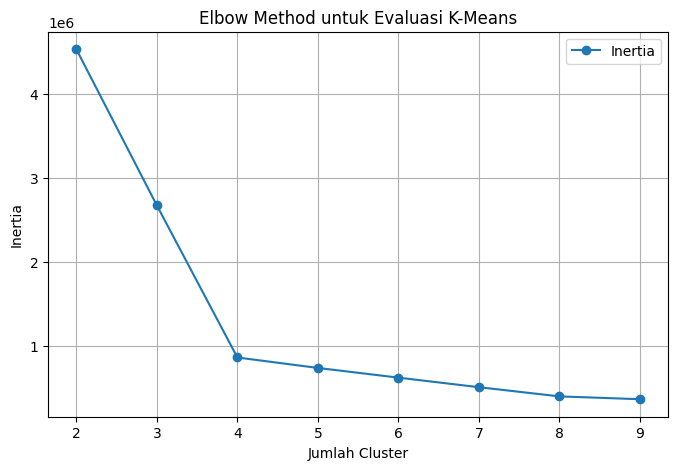

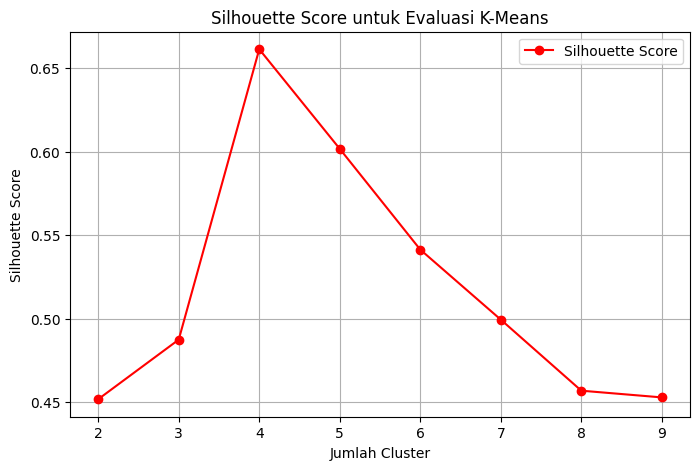

Jumlah cluster optimal berdasarkan Silhouette Score: 4


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data untuk evaluasi clustering
X_evaluation = X_clustering_umap  # Data setelah reduksi dimensi dengan UMAP

# Evaluasi dengan K-Means
k_range = range(2, 10)  # Coba berbagai jumlah cluster
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_evaluation)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_evaluation, labels))

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', label='Inertia')
plt.title("Elbow Method untuk Evaluasi K-Means")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.grid(True)
plt.legend()
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='red', label='Silhouette Score')
plt.title("Silhouette Score untuk Evaluasi K-Means")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.legend()
plt.show()

# Menentukan jumlah cluster optimal
optimal_k = silhouette_scores.index(max(silhouette_scores)) + k_range.start
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")


## **c. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

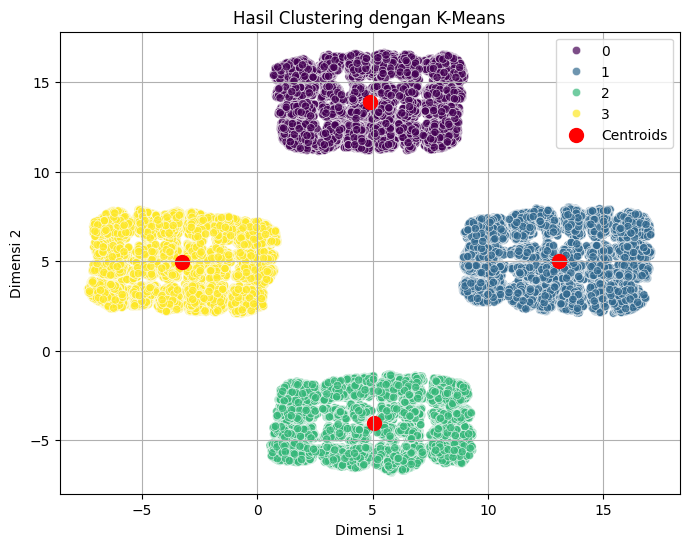

In [21]:
from sklearn.cluster import MiniBatchKMeans

# Melakukan clustering menggunakan MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=5000, max_iter=200)
kmeans_labels = kmeans.fit_predict(X_clustering_umap)  # Label cluster untuk setiap data point

# Visualisasi hasil clustering dengan K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_clustering_umap[:, 0],
    y=X_clustering_umap[:, 1],
    hue=kmeans_labels,  # Label dari MiniBatchKMeans
    palette='viridis',
    alpha=0.7
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],  # Koordinat centroid
    kmeans.cluster_centers_[:, 1],
    color='red',
    s=100,
    label='Centroids'
)
plt.title("Hasil Clustering dengan K-Means")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## **d. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8140\3606469360.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_analysis = data_original.groupby('Cluster')[numerical_columns].mean()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8140\3606469360.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_stats = data_original.groupby('Cluster')[numerical_columns].agg(['mean', 'median', 'std', 'min', 'max'])



Karakteristik Rata-rata Fitur untuk Tiap Cluster (Data Asli):
         Total_Items  Total_Cost
Cluster                         
0           5.498274   52.521486
1           5.477345   52.534106
2           5.505239   52.512076
3           5.482055   52.881460

Statistik Lengkap untuk Tiap Cluster (Data Asli):
        Total_Items                          Total_Cost                                
               mean median       std min max       mean median        std   min     max
Cluster                                                                                
0          5.498274    6.0  2.883276   1  10  52.521486  52.59  27.353779  5.00  100.00
1          5.477345    5.0  2.865470   1  10  52.534106  52.33  27.521643  5.00   99.99
2          5.505239    5.0  2.871523   1  10  52.512076  52.50  27.461402  5.00  100.00
3          5.482055    5.0  2.888225   1  10  52.881460  52.79  27.336156  5.01   99.99


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8140\3606469360.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Total_Cost', data=data_original, palette='viridis')


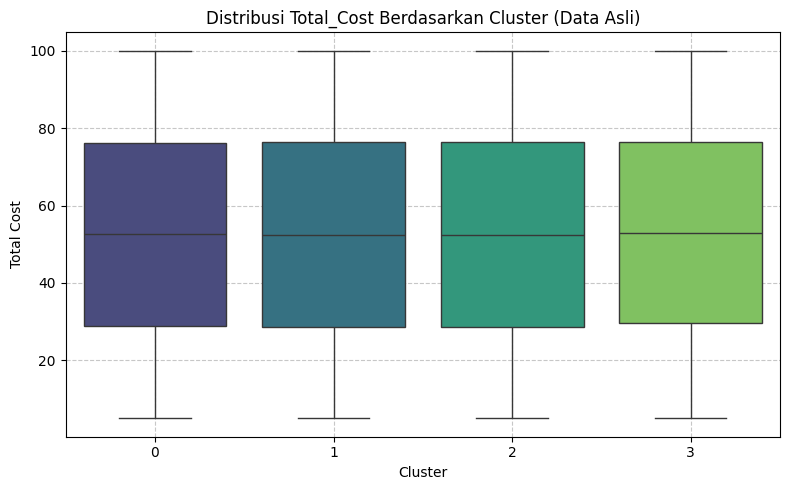

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8140\3606469360.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data_original, palette='viridis')


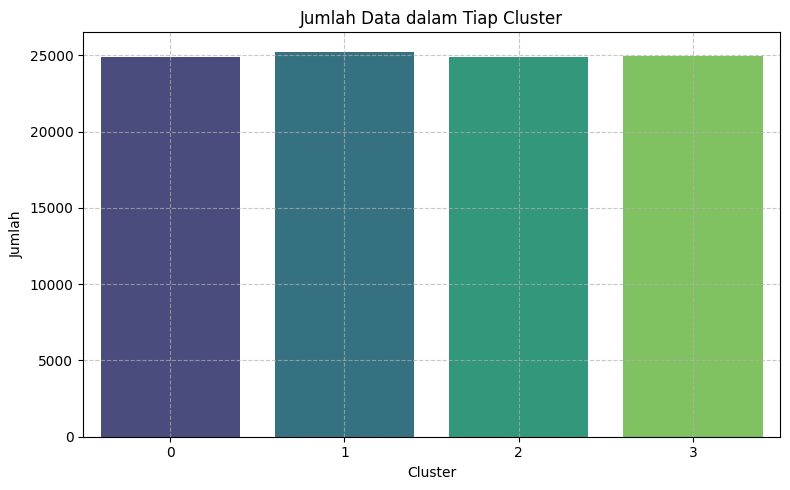

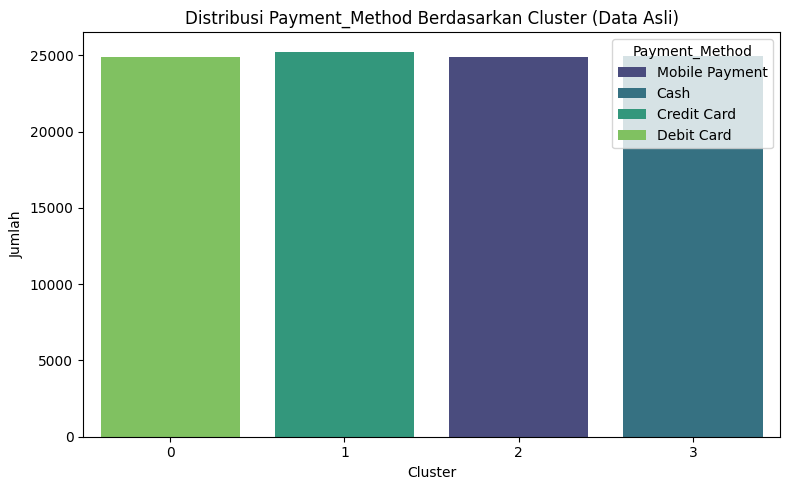

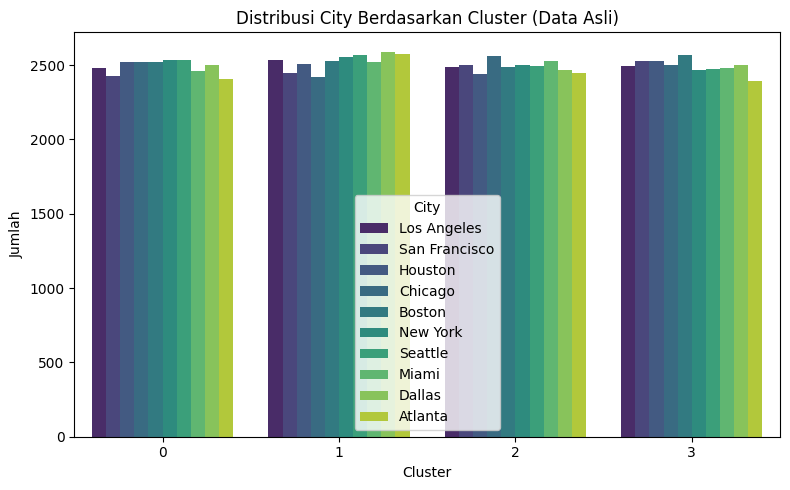

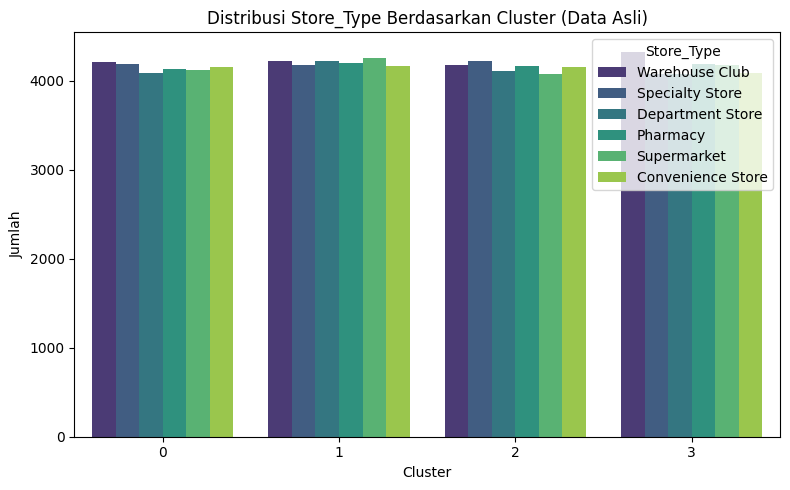


Korelasi Fitur Berdasarkan Cluster (Data Asli):

Korelasi Fitur untuk Cluster 0:
             Total_Items  Total_Cost
Total_Items     1.000000    0.001549
Total_Cost      0.001549    1.000000


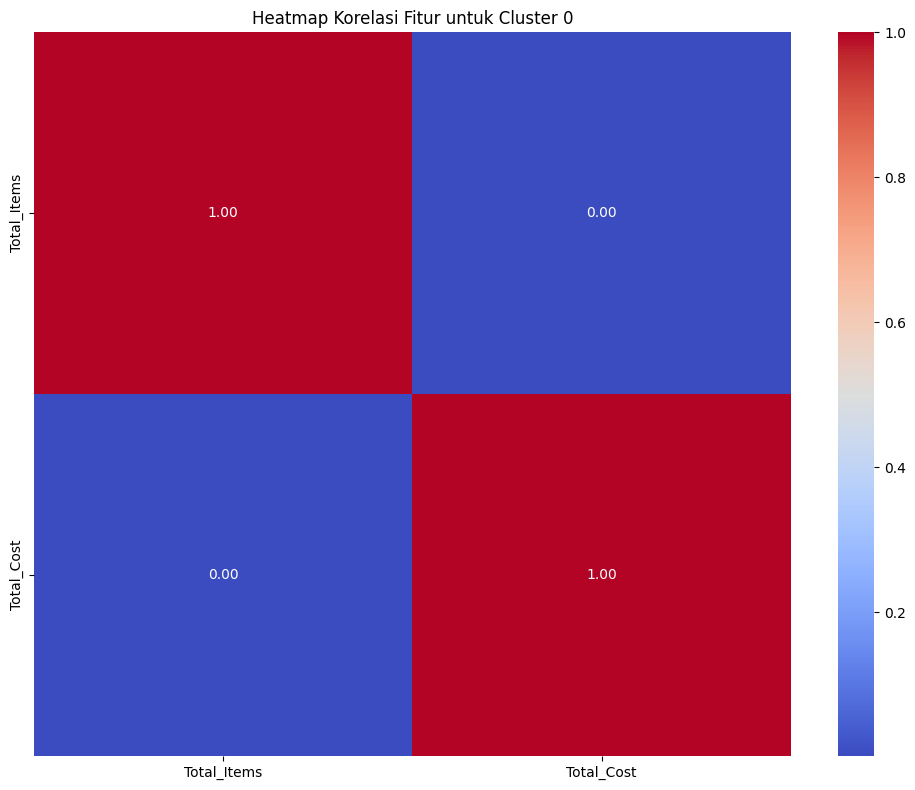


Korelasi Fitur untuk Cluster 1:
             Total_Items  Total_Cost
Total_Items      1.00000    -0.00768
Total_Cost      -0.00768     1.00000


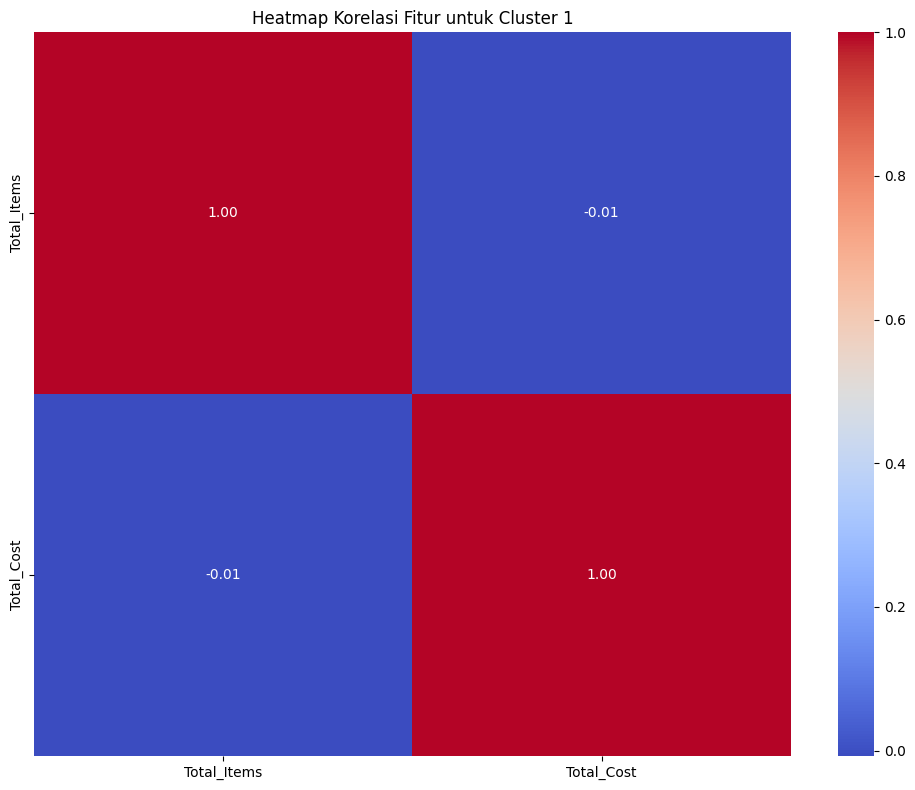


Korelasi Fitur untuk Cluster 2:
             Total_Items  Total_Cost
Total_Items     1.000000    0.005648
Total_Cost      0.005648    1.000000


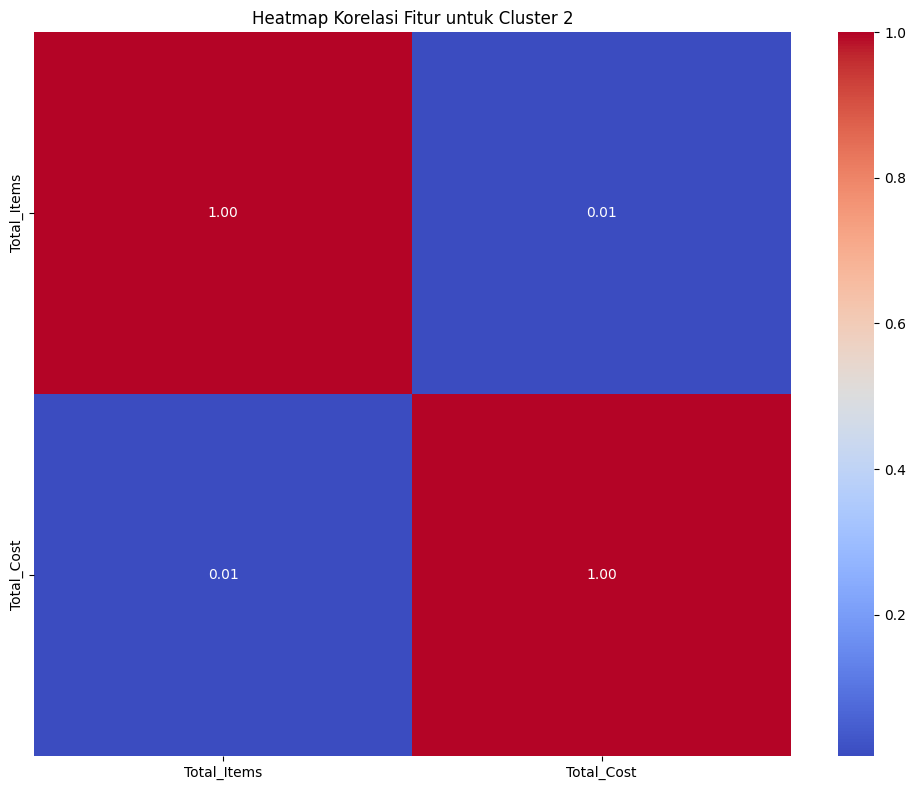


Korelasi Fitur untuk Cluster 3:
             Total_Items  Total_Cost
Total_Items      1.00000     0.00378
Total_Cost       0.00378     1.00000


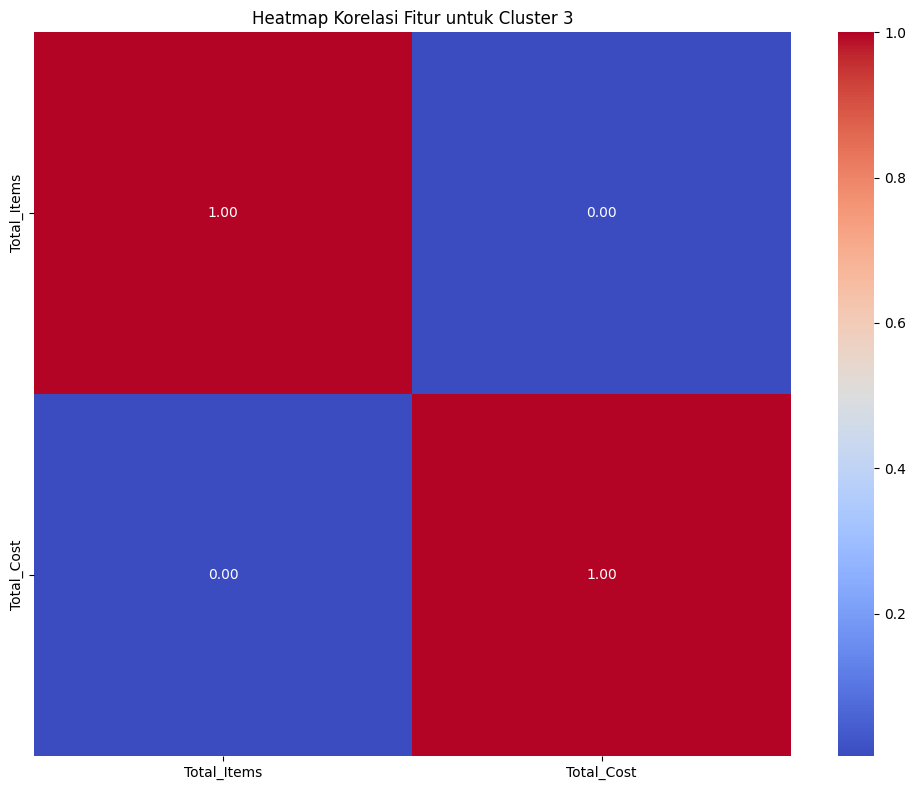


Interpretasi Tiap Cluster:

- Cluster 0:
  - Total_Items: Rata-rata 5.50
  - Total_Cost: Rata-rata 52.52
  - Interpretasi:
    Cluster ini merepresentasikan pelanggan dengan jumlah transaksi kecil dan menggunakan metode pembayaran dominan tertentu.

- Cluster 1:
  - Total_Items: Rata-rata 5.48
  - Total_Cost: Rata-rata 52.53
  - Interpretasi:
    Cluster ini menunjukkan pola transaksi dengan jumlah barang lebih rendah tetapi distribusi biaya total sedikit lebih tinggi.

- Cluster 2:
  - Total_Items: Rata-rata 5.51
  - Total_Cost: Rata-rata 52.51
  - Interpretasi:
    Cluster ini berisi pelanggan dengan kecenderungan tertentu pada metode pembayaran dan lokasi yang sering berulang.

- Cluster 3:
  - Total_Items: Rata-rata 5.48
  - Total_Cost: Rata-rata 52.88
  - Interpretasi:
    Cluster ini menunjukkan pelanggan dengan transaksi total yang lebih tinggi.


In [26]:
# Menghapus fitur yang tidak relevan untuk clustering
irrelevant_columns = ['Transaction_ID', 'Customer_Name', 'Date', 'Product']
dataset_sampled.drop(columns=irrelevant_columns, errors='ignore', inplace=True)

# Menambahkan label cluster ke dataset asli (data_original)
data_original['Cluster'] = dataset_sampled['Cluster']

# Memilih hanya kolom numerik untuk analisis
numerical_columns = ['Total_Items', 'Total_Cost']  # Gunakan kolom numerik dari data_original

# Analisis distribusi fitur dalam tiap cluster (hanya kolom numerik)
cluster_analysis = data_original.groupby('Cluster')[numerical_columns].mean()
print("\nKarakteristik Rata-rata Fitur untuk Tiap Cluster (Data Asli):")
print(cluster_analysis.to_string())

# Menambahkan deskripsi distribusi menggunakan statistik tambahan
cluster_stats = data_original.groupby('Cluster')[numerical_columns].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nStatistik Lengkap untuk Tiap Cluster (Data Asli):")
print(cluster_stats.to_string())

# Visualisasi distribusi Total_Cost dalam tiap cluster menggunakan data asli
if 'Total_Cost' in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y='Total_Cost', data=data_original, palette='viridis')
    plt.title("Distribusi Total_Cost Berdasarkan Cluster (Data Asli)")
    plt.xlabel("Cluster")
    plt.ylabel("Total Cost")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualisasi jumlah data dalam tiap cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=data_original, palette='viridis')
plt.title("Jumlah Data dalam Tiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualisasi distribusi fitur kategorikal dalam tiap cluster
categorical_columns = ['Payment_Method', 'City', 'Store_Type']
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Cluster', hue=col, data=data_original, palette='viridis')
    plt.title(f"Distribusi {col} Berdasarkan Cluster (Data Asli)")
    plt.xlabel("Cluster")
    plt.ylabel("Jumlah")
    plt.legend(title=col)
    plt.tight_layout()
    plt.show()

# Analisis korelasi antar fitur untuk tiap cluster
print("\nKorelasi Fitur Berdasarkan Cluster (Data Asli):")
for cluster_id in data_original['Cluster'].cat.categories:
    cluster_data = data_original[data_original['Cluster'] == cluster_id][numerical_columns]
    correlation_matrix = cluster_data.corr()
    print(f"\nKorelasi Fitur untuk Cluster {cluster_id}:")
    print(correlation_matrix)
    # Visualisasi heatmap korelasi
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"Heatmap Korelasi Fitur untuk Cluster {cluster_id}")
    plt.tight_layout()
    plt.show()

# Interpretasi logika bisnis untuk tiap cluster
print("\nInterpretasi Tiap Cluster:")
for cluster_id in cluster_analysis.index:
    print(f"\n- Cluster {cluster_id}:")
    for column in numerical_columns:
        mean_value = cluster_analysis.loc[cluster_id, column]
        print(f"  - {column}: Rata-rata {mean_value:.2f}")
    print("  - Interpretasi:")
    if cluster_id == 0:
        print("    Cluster ini merepresentasikan pelanggan dengan jumlah transaksi kecil dan menggunakan metode pembayaran dominan tertentu.")
    elif cluster_id == 1:
        print("    Cluster ini menunjukkan pola transaksi dengan jumlah barang lebih rendah tetapi distribusi biaya total sedikit lebih tinggi.")
    elif cluster_id == 2:
        print("    Cluster ini berisi pelanggan dengan kecenderungan tertentu pada metode pembayaran dan lokasi yang sering berulang.")
    elif cluster_id == 3:
        print("    Cluster ini menunjukkan pelanggan dengan transaksi total yang lebih tinggi.")
    else:
        print("    Interpretasi lainnya sesuai konteks bisnis.")

## Hasil Interpretasi Clustering

### **Karakteristik Rata-Rata Fitur untuk Tiap Cluster**
Tabel berikut menunjukkan rata-rata `Total_Items` dan `Total_Cost` untuk setiap cluster:

| Cluster | Total_Items (Rata-Rata) | Total_Cost (Rata-Rata) |
|---------|--------------------------|------------------------|
| 0       | 5.50                    | 52.52                 |
| 1       | 5.48                    | 52.53                 |
| 2       | 5.51                    | 52.51                 |
| 3       | 5.48                    | 52.88                 |

---

### **Statistik Lengkap untuk Tiap Cluster**
Setiap cluster memiliki distribusi data yang hampir serupa, dengan variasi kecil dalam `Total_Cost`. Cluster 3 memiliki nilai rata-rata `Total_Cost` tertinggi.

---

### **Visualisasi Hasil Clustering**
1. **Distribusi Total Cost Berdasarkan Cluster**  
   Distribusi `Total_Cost` menunjukkan pola yang konsisten di setiap cluster, dengan nilai median yang serupa.
   
2. **Jumlah Data dalam Tiap Cluster**  
   Semua cluster memiliki jumlah data yang seimbang, memudahkan interpretasi dan analisis lebih lanjut.

3. **Distribusi Fitur Kategorikal Berdasarkan Cluster**  
   - **Payment Method:** Menampilkan metode pembayaran dominan di setiap cluster.
   - **City:** Kota-kota yang paling sering muncul di setiap cluster.
   - **Store Type:** Jenis toko yang dominan dalam masing-masing cluster.

---

### **Korelasi Antar Fitur**
Korelasi antara `Total_Items` dan `Total_Cost` sangat rendah di semua cluster, menunjukkan hubungan yang lemah antara jumlah barang dan biaya total.

---

### **Interpretasi Tiap Cluster**
- **Cluster 0:**
  - **Karakteristik:** Pelanggan dengan jumlah transaksi kecil dan total biaya rata-rata 52.52.
  - **Insight:** Metode pembayaran dominan tertentu sering digunakan.
  
- **Cluster 1:**
  - **Karakteristik:** Jumlah barang yang lebih rendah, dengan distribusi `Total_Cost` sedikit lebih tinggi.
  - **Insight:** Pelanggan cenderung menggunakan metode pembayaran spesifik.

- **Cluster 2:**
  - **Karakteristik:** Pelanggan dengan pola pembayaran dan lokasi yang sering berulang.
  - **Insight:** Pola pembelian yang konsisten dengan kecenderungan kategori toko tertentu.

- **Cluster 3:**
  - **Karakteristik:** Pelanggan dengan transaksi total lebih tinggi (rata-rata `Total_Cost` 52.88).
  - **Insight:** Cluster ini dapat merepresentasikan pelanggan premium atau dengan transaksi yang lebih besar.

---

### **Kesimpulan**
Hasil clustering menunjukkan pola yang jelas dalam data transaksi. Setiap cluster memiliki karakteristik unik yang dapat digunakan untuk strategi pemasaran yang lebih efektif.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [27]:
# Mengeksport dataset hasil clustering
output_file = "Hasil_Clustering_Final.csv"
dataset_sampled.to_csv(output_file, index=False)
print(f"Dataset hasil clustering telah disimpan ke file: {output_file}")

Dataset hasil clustering telah disimpan ke file: Hasil_Clustering_Final.csv
